# Table of Contents:

- [Importing Libraries and Data](#Importing)


- [Data Exploration:](#Exploration)
    - [Checking Normal Distribution of Data](#distribution-check)
    - Describe shape, describe, etc.....
    - [Summary of Findings](#exploration-summary)
    
    
- [Data Cleaning:](#Cleaning)
    - [Checking for Duplicates:](#duplicates) 
    - [Coverting Datatypes:](#Converting-Datatypes)
        - [Date to Datetime Format](#convert_datetime)
    - [Dealing With Missing and Extraneous Values:](#Missing) 
       - ['yr_renovated'](#cleaning_yr_renovated)
       - ['sqft_basement'](#cleaning_sqft_basement)
    - [Dummy Coding Categorical Variables:](#Dummy-Coding)
        - ['Zip Code'](#Dummy-Zip)
        - ['Waterfront'](#dummy_waterfront)


- [Model Decisions:](#model-decisions) 
    - [Correlation Matrices](#corr-matrices) 
    - [Checking for Linear Assumptions:](#linear-assumption) 
  

- [Training and Testing Our MultiLinear Regression Model:](#train-test-mlr)
    - [Model 1](#model-1)
    - [Model 2](#model-2) 


- [Summary of Findings:](#conclusion)
    

<a id="Importing"></a>
# Importing Libraries and Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('kc_house_data.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')

<a id="Exploration"></a>
# Initial Data Exploration:

<a id="exploration-summary"></a>
## Summary of Initial Exploratory Findings:

#### Distribution:

* Histogram of 'price' shows only a few outliers beyond $1 Million. 
    * Accounts for only 6.75% of dataset, 
    * Decision to drop these outliers from final dataset, used by our model
* 'Bedrooms' has an unlikely maximum of 33 units.  
* 'sqft_lot' has an unlikely maximum of 1.65 Million sqft
* 'yr_renovated' seems to have limited data


#### Wrongly Formatted:
* 'sqft_basement' needs to be in integer or float format
* 'date' needs to be in datetime format

#### NaN Values
* 'waterfront', 'view' and 'yr_renovated' have NaN values

#### Duplicate Entries
* The properties that were entered twice have been kept in
    * No rows are exactly the same, majority are 6 month turnaround with jump in price
    * Our best guess is the first entry was an undervaluation caused by foreclosure
    * Keeping both entries will average out each other

In [2]:
df.shape

(21597, 21)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [5]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Ambiguous Columns: 
- waterfront = if the property has a view to the waterfront
- view = "has been viewed" (scale of 0-4, predominately 0)
- condition = overall state of condition (1-5)
- grade = "king's grading system" (only 3-13 shown, might be on a larger range)
- sqft_living15/lot15 = sqft of living/lot area of 15 closest neighbors

<a id="Missing"></a>
## Checking for Missing and Extraneous Values:

In [20]:
df_cleaned.isna().sum().sum()
#Check first if there is any na values.  we find that there's 6281 na values

5854

In [21]:
df_cleaned.isna().sum().sort_values(ascending=False)
#We can see from this that the columns for yr_renovated and waterfront have a lot of na values.  view only has some

yr_renovated     3570
waterfront       2227
view               57
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

<a id="duplicates"></a>
## Checking for Duplicates:

In [14]:
df_cleaned.shape

(20107, 21)

In [85]:
df_cleaned.nunique().sort_values(ascending=False)

id               19938
sqft_lot          9126
sqft_lot15        8073
lat               5010
price             3427
sqft_living        876
sqft_above         820
long               749
sqft_living15      704
date               370
sqft_basement      265
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           25
bedrooms            12
grade               10
floors               6
condition            5
view                 5
waterfront           3
dtype: int64

In [16]:
df_cleaned[df_cleaned.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### - Duplicates of id

In [17]:
df_cleaned[df_cleaned['id'].duplicated(keep = False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
717,8820903380,7/28/2014,452000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,0.0,0.0,...,7,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242


In [18]:
df_cleaned[df_cleaned['id'].duplicated()].shape

(169, 21)

## Distributions

### - Distribution of Price

In [71]:
# % of houses above the threshold
(len(df[df['price']>cut_off_price]))/(len(df['price']))*100

6.750937630226421

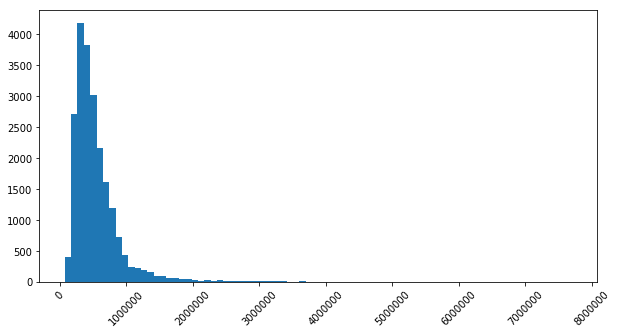

In [82]:
df['price'].hist(xlabelsize=10, xrot=45, bins=80, grid=False, figsize=(10,5));

### - Distribution across all variables

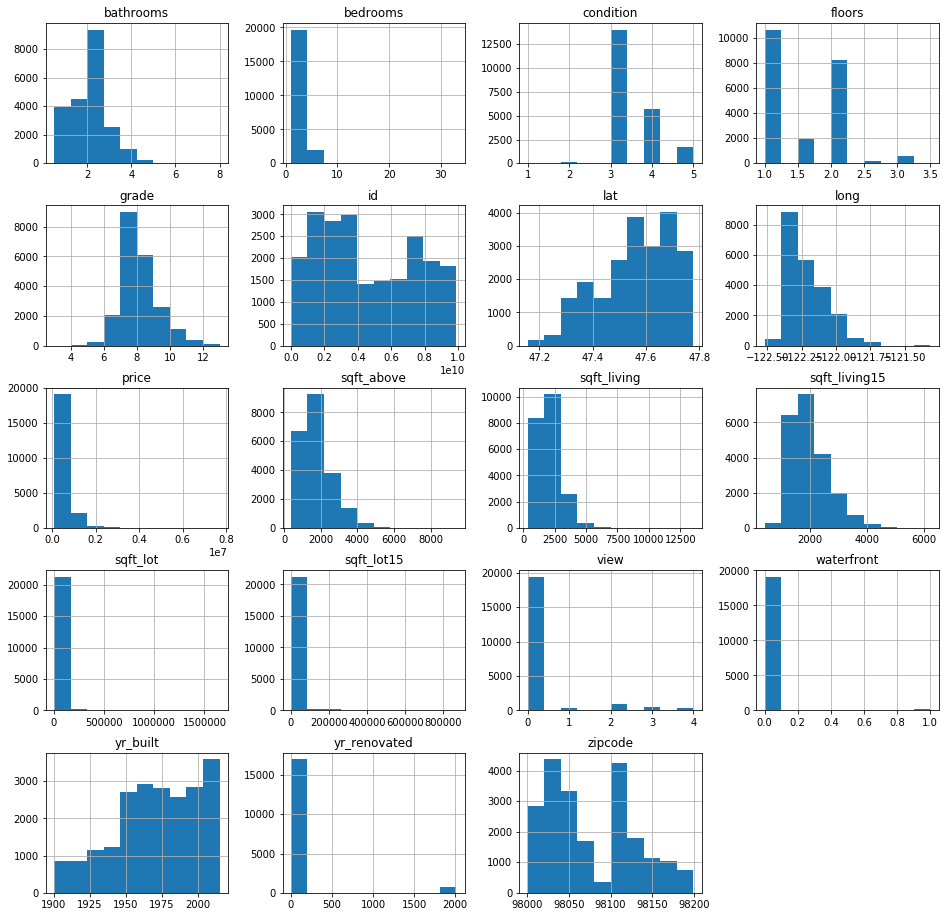

In [9]:
fig = plt.figure(figsize = (16,16))
ax = fig.gca()
df.hist(ax = ax);

<a id="Cleaning"></a>
# Data Cleaning:

## Dropping Data

In [99]:
#creating a new dataframe for cleaned variables 
df_cleaned = df

### - Dropping Price Outliers

In [101]:
cut_off_price = 1000000
df_cleaned = df_cleaned[df_cleaned['price']<cut_off_price]

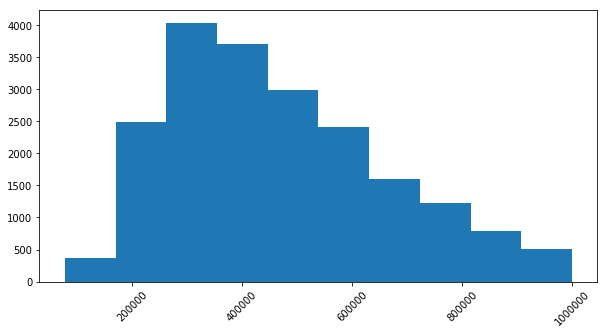

In [102]:
df_cleaned['price'].hist(xlabelsize=10, xrot=45, figsize=(10,5), grid=False, bins=10);

### - Dropping Extreme Bedrooms Value

In [103]:
df_cleaned = df_cleaned[df_cleaned['bedrooms']<33]

In [105]:
df_cleaned['bedrooms'].max()

11

<a id="Dummy-Coding"></a>
## Dummy-Coding Categorical Variables:

### - Waterfront

In [22]:
df_cleaned['waterfront'].value_counts()

0.0    17831
1.0       49
Name: waterfront, dtype: int64

In [23]:
# replaced the NaN values in 'waterfront' with the value 2.
df_cleaned['waterfront'] = df_cleaned['waterfront'].replace(np.nan,2)

In [24]:
#df_cleaned up to date til this stage
df_cleaned.shape

(20107, 21)

<a id="cleaning_yr_renovated"></a>
### Examining Missing Data in 'yr_renovated':

In [25]:
df_cleaned['yr_renovated'].value_counts().head()

0.0       15939
2014.0       63
2013.0       27
2000.0       25
2007.0       23
Name: yr_renovated, dtype: int64


###### We can see from this that almost 96% of values in this column are '0'.  This column therefore doesn't offer much value
###### This is in addition to the NA values shown before
###### We can assume its bad data as when we look at duplicates and "quick rennovation" idea, the yr_renovated column is often == 0


## Dealing with NaN values

<a id="cleaning_sqft_basement"></a>
### Replacing Nan and Extraneous Values in 'sqft_basement':

In [26]:
#Check for extraenuous values
df_cleaned['sqft_basement'].sort_values(ascending=False).head(2)
#displays top two rows - we can see that there are ? values

4179     ?
20929    ?
Name: sqft_basement, dtype: object

In [27]:
#creating a new temporary dataframe of sqft_basement, that doesn't include nan or '?'
df_sqft_no_nan = df_cleaned[(~df_cleaned['sqft_basement'].isna()) & (df_cleaned['sqft_basement'] != '?')]

In [28]:
# How many nan and '?' values have we dropped? 
len(df) - len(df_sqft_no_nan)

1914

In [29]:
#can see that nan values in sqft_basement have been dropped from this dataframe
#e.g. row/index 6
df_sqft_no_nan['sqft_basement'].head(8)

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
7      0.0
8    730.0
9      0.0
Name: sqft_basement, dtype: object

In [30]:
#convert whole column to int64 format
df_sqft_no_nan['sqft_basement'] = df_sqft_no_nan['sqft_basement'].astype(float)

df_sqft_no_nan['sqft_basement'].dtype
#shows that the df_sqft_no_nan is dtype int64

dtype('float64')

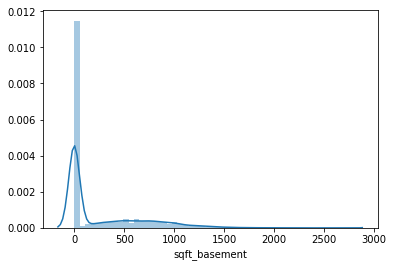

In [31]:
sns.distplot(df_sqft_no_nan['sqft_basement']);
#the vast majority have a value of 0, otherwise the data looks normally distributed

In [32]:
df_sqft_no_nan['sqft_basement'].value_counts(normalize=True).head(3)
# can see that 61% of sqft_basement is 0

0.0      0.623228
600.0    0.010669
500.0    0.010415
Name: sqft_basement, dtype: float64

In [33]:
df_sqft_no_nan['sqft_basement'].describe().T
# median = 0, mean = 291.9

count    19683.000000
mean       262.514098
std        403.504963
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       2720.000000
Name: sqft_basement, dtype: float64

In [34]:
df_cleaned.shape

(20107, 21)

In [ ]:
sqft_basement_median = float(np.median(df_sqft_no_nan['sqft_basement']))

df_cleaned = df_cleaned.fillna(sqft_basement_median)
df_cleaned = df_cleaned.replace('?',sqft_basement_median)

<a id="Converting-Datatypes"></a>
## Converting Datatypes:

### Converting 'sqft_basement' to float format:

In [67]:
df_cleaned['sqft_basement'] = df_cleaned ['sqft_basement'].astype(float)
type(df_cleaned['sqft_basement'][1])

numpy.float64

<a id="datetime"></a>
### Converting 'date' to datetime format:

In [19]:
#converted the 'date' column from object to datetime format
pd.to_datetime(df_cleaned['date'], format="%m/%d/%Y").head(3)


0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: date, dtype: datetime64[ns]

# Further Exploring of Data

Controllable: factors which homeowners conceivably have the opportunity to improve upon
* Size: sqft_basement, sqft_above, sqft_living, sqft_lot
* Amenities: bathrooms, bedrooms, floors
* Upkeep: grade, condition, yr_renovated

## Data Distribution

In [60]:
#DFs for plotting different controllable groups
df_size = df_cleaned[['sqft_above', 'sqft_lot', 'sqft_living', 'sqft_basement']]
df_amenities = df_cleaned[['bathrooms', 'bedrooms', 'floors']]
df_upkeep = df_cleaned[['grade', 'condition', 'yr_renovated']]

### - Histograms for Size variables

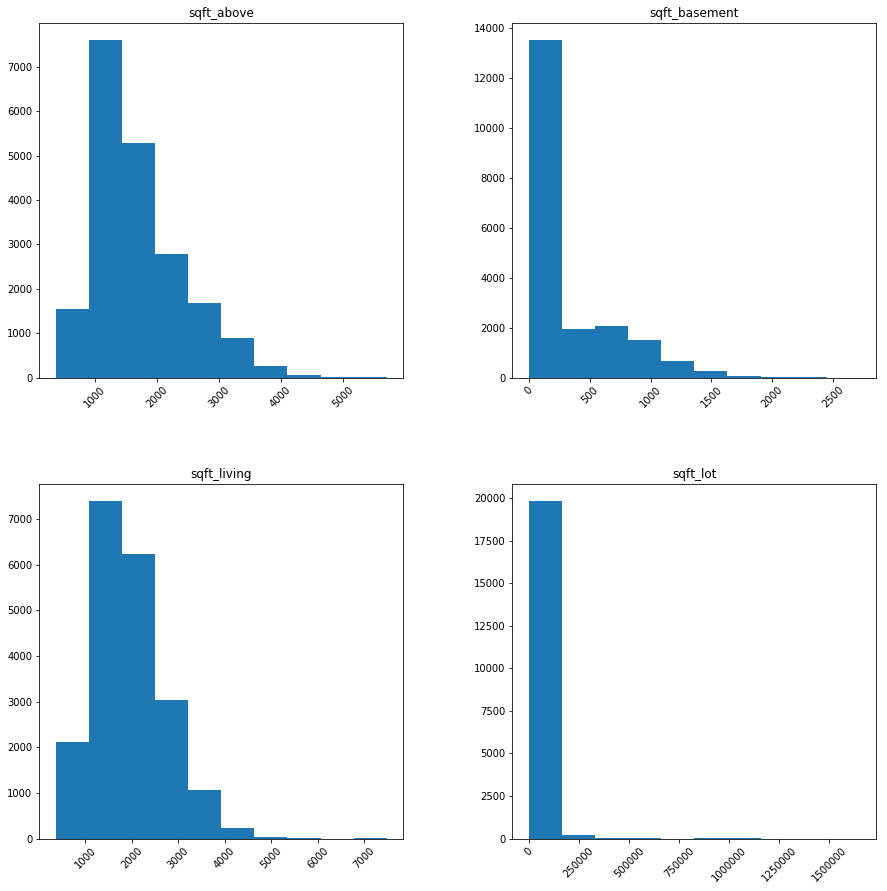

In [55]:
df_size.hist(xlabelsize=10, xrot=45, figsize=(15,15), grid=False);

### - Histograms for Amenities variables

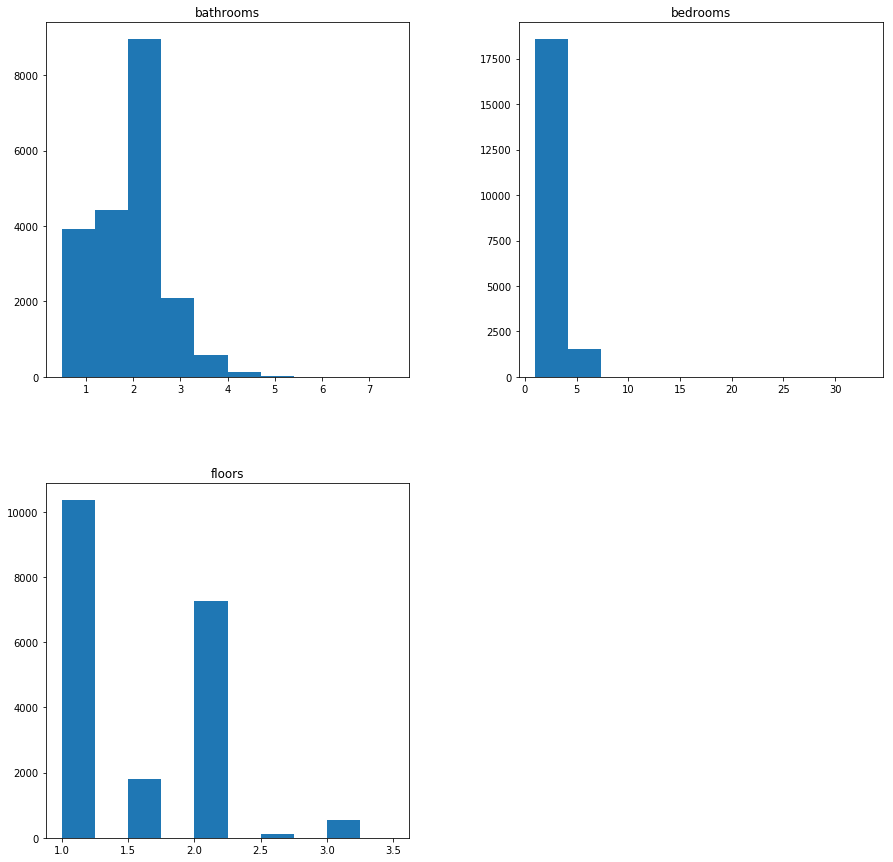

In [57]:
df_amenities.hist(xlabelsize=10, figsize=(15,15), grid=False);

### - Histograms for Upkeep variables

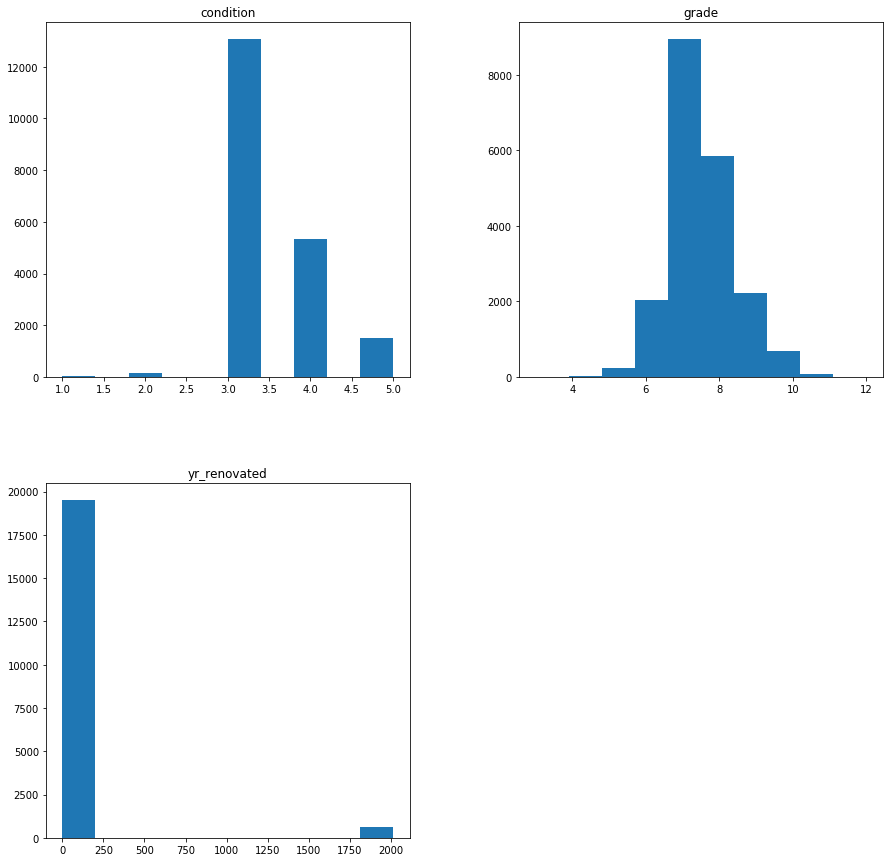

In [59]:
df_upkeep.hist(xlabelsize=10, figsize=(15,15), grid=False);

<a id="exploration-summary"></a>
## Summary of Exploratory Findings:

#### Normal Distribution:

We noticed from looking at the histogram of price that all but 11 houses had a price range of $4 million or less. Since these houses only accounted for 0.05 percent of the total number of records in our dataset, we decided to drop these outliers from our final dataset for our model. Keeping these records in could cause our model to **underfit? 

#### Ambiguous Data: Several variables are ambiguous in nature, and will require interpretation to our best ability. These include:
- waterfront = if the property has a view to the waterfront
- view = "has been viewed" (scale of 0-4, predominately 0)
- condition = overall state of condition (1-5)
- grade = king's grading system (only 3-13 shown, might be on a larger range)
- sqft_living15/lot15 = sqft of living/lot area of 15 closest neighbors

#### Converting Missing/Extraneous Values: Several variables have missing or extraneous values that will need to be converted in order to be entered into our regression model

# Modeling Decisions:

## Checking For Normal Distributions:

## Checking Linear Relationship Assumption:

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms','floors'], axes):
    df_cleaned.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
#see previous comments in categorizing zipcode; decision to use sq_ft_!5 instead
#scatter to see if there's extremes of zipcode vs price
#get the mean price of each property in each zipcode category and plot mean price vs zipcode


## Correlation Matrices:

### Investigating Top Predictors of Price:

In [ ]:
#df_cleaned.corr()[['price']].sort_values(by=['price'], ascending=False)
    

In [ ]:
#Plot a heatmap to see where which variables are strongly correlated with target "price"
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr()[['price']].sort_values(by=['price'],ascending=False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True)
#from the heatmap below we can see that there are no strong negative correlations, but there are several positive correlations:
#bathrooms, sqft_living, grade, sqft_above, sqft_living15

## Investigating Multicollinearity:

In [ ]:
#no correlations above .90 - can assume independence of IVs
#df_cleaned.corr().round(2)


In [ ]:
# come back and add a filter for correlation table so zip codes are not displayed
#checking for correlations of .90 or above between IVs 
plt.figure(figsize = (15, 15))
sns.heatmap(df_cleaned.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);



# Building a MLR Model:  

### "How Can Homeowners Improve The Selling Price of their Home?"

####  In order to answer this question, we first categorized the variables in our dataset into two categories: 

#### Uncontrollable: factors which are beyond the homeowners' control
- Geographic: latitude, longitude, zipcode, sqft_living15, waterfront

#### Controllable: factors which homeowners conceivably have the opportunity to improve upon
- Size: sqft_basement, sqft_above, sqft_living, sqft_lot
- Amenities: bathrooms, bedrooms, floors
- Upkeep: grade, condition, yr_renovated

#### Based on examining correlation coefficients and our understanding of the variables' relationships to one another we decided to do use a stepwise approach to building an optimal regression model.

In [ ]:
#displaying full list of variables
df_cleaned.columns

## Baseline Model 

In [ ]:
#calculating baseline model R^2 = 0.0
import sklearn as sk
df_cleaned['price_pred'] = df_cleaned['price'].mean()
sk.metrics.r2_score(df_cleaned['price'],df_cleaned['price_pred'])

## Model 0: Baseline Model

In [ ]:
X0 = df_cleaned[['price_pred']]
y = df_cleaned[['price']]

model0 = sm.OLS(y, X0).fit()
model0.summary()

## Model 1: sqft_living

In [ ]:
# setting our dependent and independent variables for Model 1
X1 = df_cleaned[['sqft_living']]
y = df_cleaned[['price']]

# Displaying summary of Model 1 OLS
model1 = sm.OLS(y, X1).fit()
model1.summary()

In [ ]:
# OLD CODE (DIDNT HAVE LABELS OF PREDICTORS)
# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model_1 = sm.OLS(y, predictors_int).fit()    
# model_1.summary()

## Model 2:  sqft_living, grade

In [ ]:
X2 = df_cleaned[['sqft_living','grade']]
y = df_cleaned[['price']]

model2 = sm.OLS(y, X2).fit()
model2.summary()

# X2 = df_cleaned[['sqft_living','grade']]
# y = df_cleaned[['price']]

# predictors = np.asarray(X)  
# predictors_int = sm.add_constant(predictors) 

# model = sm.OLS(y, predictors_int).fit()    
# model.summary() 

## Model 3: sqft_living, grade, bathrooms

In [ ]:
X3 = df_cleaned[['sqft_living', 'grade','bathrooms']]
y = df_cleaned[['price']]

model3 = sm.OLS(y, X3).fit()
model3.summary()
#coef of bathrooms is -ve!!

In [ ]:
# NUMBERS SEEM VERY OFF. ALSO NUMBERS DONT AGREE WITH ABOVE, BUT SHOULDNT THEY BE THE SAME?

X3 = df_cleaned[['sqft_living', 'grade','bathrooms']]
y = df_cleaned[['price']]

predictors = np.asarray(X3)  #setting what the predictors are 
predictors_int = sm.add_constant(predictors) #
model = sm.OLS(y, predictors_int).fit()    
model.summary() #look at OLS stats documentation to see if we can pull out coefficients

##### Because the relationship between bathrooms and price was found to be negative (which doesn't make logical sense), we decided to drop bathrooms from the model and add another feature (bedrooms) into the model 4 below

## Model 4:  sqft_living, grade, bedrooms

In [ ]:
X4 = df_cleaned[['sqft_living','grade','bedrooms']]
y = df_cleaned[['price']]

model4 = sm.OLS(y, X4).fit()
model4.summary()

#!Bedrooms coef very -ve

# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model = sm.OLS(y, predictors_int).fit()    
# model.summary() #look at OLS stats documentation to see if we can pull out coefficients

##### Because the relationship between bedrooms and price was found to be negative (which doesn't make logical sense), we decided to drop bedrooms from the model and add another feature (floors) into the model 5 below

## Model 5:  sqft_living, grade, floors

In [ ]:
X5 = df_cleaned[['sqft_living','grade','floors']]
y = df_cleaned[['price']]

model5 = sm.OLS(y, X5).fit()
model5.summary()

#!Floors coef -ve

# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model = sm.OLS(y, predictors_int).fit()    
# model.summary() #look at OLS stats documentation to see if we can pull out coefficients

## Model 6: note: explored with diff. variable iterations, none of which worked. Not including in chart.

In [ ]:
X6 = df_cleaned[['sqft_living','grade','sqft_lot']]
y = df_cleaned[['price']]

model6 = sm.OLS(y, X6).fit()
model6.summary()

#sqft_lot seems to have no impact.  (very small coefficient)

# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model = sm.OLS(y, predictors_int).fit()    
# model.summary() #look at OLS stats documentation to see if we can pull out coefficients

## Model 7:  sqft_living, grade, floors, bathrooms, bedrooms, sqft_lot

In [ ]:
X7 = df_cleaned[['sqft_living','grade', 'floors', 'bathrooms', 'bedrooms', 'sqft_lot']]
y = df_cleaned[['price']]

model7 = sm.OLS(y, X7).fit()
model7.summary()

#highest R^2 BUT
# p value of bathrooms is too high?
# coef of bathrooms is MASSIVELY -ve
# coef of sqft_lot still very low

## Model 8:  sqft_living, grade, bathrooms, 

In [ ]:
X8 = df_cleaned[['sqft_living','grade', 'bathrooms']]
y = df_cleaned[['price']]

model8 = sm.OLS(y, X8).fit()
model8.summary()

## Model 9:  sqft_above, sqft_ basement, grade, floors, bathrooms, bedrooms

In [ ]:
X9 = df_cleaned[['sqft_above', 'sqft_basement', 'grade', 'floors', 'bathrooms', 'bedrooms']]
y = df_cleaned[['price']]

model9 = sm.OLS(y, X9).fit()
model9.summary()

## Training and Testing Our Model Using K-Fold Cross-Validation:

### Decided to test Model 2 with sqft_living and grade, based on R^2 and coefficents

In [ ]:
X = df_cleaned[['sqft_living','grade']]
y = df_cleaned[['price']]

predictors = np.asarray(X)  
predictors_int = sm.add_constant(predictors) 
model = sm.OLS(y, predictors_int).fit()    
model.summary() 

In [ ]:
#setting up the train/test splits for cross-validating our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
#preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
#Fit the model and apply the model to the make test set predictions 
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
#Calculate the residuals and the mean squared error
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)**0.5
test_mse  
#test_mse results indicate our residuals are, on average, a distance of
#$240,450 from the fitted line


In [ ]:
#Residual Plot:
#qq plots show 
residuals = model.resid
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

In [ ]:
residuals.hist(bins=200)


# Summary of Findings